# Section I: Provided Data Cleaning

Problem Statement
Project Overview: City Year is enabling a digital fundraising model to support our Annual Fund Strategy. The Annual fund seeks to raise annual operating dollars from a broad-based engagement strategy targeted toward under 10,000 USD donors. This enables City Year to increase awareness for our mission, engage individual donors to support our work and advance our strategic objectives to advance educational equity by helping students and schools succeed, while preparing the next generation of leaders who can work across lines of difference. Through the hackathon, Deloitte would support City Year in building a predictive pricing model for us to better understand ask amounts and channels to tier giving amounts for use in annual solicitations that are appropriate for the donor’s giving capacity and to potentially encourage a larger gift. In addition, Deloitte will help us understand timing for these solicitations (e.g., at what point in the donor journey should the ask be made, at what time in the calendar year, etc.)

Desired Outcomes:

Understand giving behaviors for under 10,000 USD donor segment
Establish giving (pricing) levels to apply to donor segments
Key Performance Indicators:

A/B test giving levels – predictive pricing model vs current pricing model
Fall vs. Spring solicitation performance

In [1]:
import pandas as pd 
import csv

Data Sources Introduction
All Contacts who are Donors
This dataset contains all the salesforce contacts of previous donors to City Year (some are above the giving $10,000 segment, but if they have at least one transaction < 10,000 they are considered within the segement). Included in this data are a few field describing the contact, as well as some summary level information on previous donatation (last donation, first donation etc.)

In [2]:
prev_donors = pd.read_csv('./All Contacts who are Donors.csv', encoding='cp437')

In [3]:
prev_donors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104815 entries, 0 to 104814
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Mailing State/Province         98462 non-null   object 
 1   Mailing Zip/Postal Code        97948 non-null   object 
 2   Mailing Country                97413 non-null   object 
 3   Contact ID                     104815 non-null  object 
 4   Account ID                     104815 non-null  object 
 5   Legacy SF ID                   103992 non-null  object 
 6   Legacy SF ID.1                 103990 non-null  object 
 7   Gender                         74023 non-null   object 
 8   Age                            4768 non-null    float64
 9   Marital Status                 7548 non-null    object 
 10  Race & Ethnicity               3088 non-null    object 
 11  Best Gift Year Total           77723 non-null   float64
 12  Total Gifts                   

In [4]:
prev_donors.head()

,Mailing State/Province,Mailing Zip/Postal Code,Mailing Country,Contact ID,Account ID,Legacy SF ID,Legacy SF ID.1,Gender,Age,Marital Status,...,City Year Site 2,Active Staff or Corps,Total Gifts Two Years Ago,Soft Credit Two Years Ago,City Year Position,City Year Position 2,Alumni Volunteer Interests,Current Professional Industry,Owner Site Location,Owner Site Location.1
0,NY,10804-4320,US,0035Y000042aJls,0015Y00002sBxqb,003U000000nWfBIIA0,001U000000fXPs4IAG,Male/Man,122.1,NaN,...,NaN,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NY,10003,US,0035Y000042ZsTC,0015Y00002sCjxU,003U000000nWfBEIA0,001U000000fXOjOIAW,Male/Man,122.1,Married,...,NaN,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NJ,7043,US,0035Y000042Zplr,0015Y00002sCIXQ,003U000000nWfBNIA0,001U000000fXFcLIAW,Male/Man,122.1,Married,...,NaN,0,0.0,860.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NY,10013,US,0035Y000042aIxx,0015Y00002sBovS,003U000000nWfBzIAK,001U000000fXMazIAG,Male/Man,122.1,NaN,...,NaN,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,LA,71106-8392,US,0035Y000042aVa1,0015Y00002sC2wa,003U000000nWfCFIA0,001U000000fXN3HIAW,Female/Woman,122.1,Married,...,NaN,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


Giving Transactions
Giving Transactions are records of all completed donation transcations spanning back to 1999. Included in this data is the staff memeber at city year involved in securing the donation.

In [6]:
new_giving_transactions = pd.read_csv('./Payment Transactions 1999_2017.csv', encoding='cp437')

C:\Users\canderton\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
new_giving_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189833 entries, 0 to 189832
Data columns (total 14 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   Staff Member                                         188914 non-null  object 
 1   Amount                                               189833 non-null  float64
 2   Payment Number                                       189833 non-null  object 
 3   GAU Allocation Name                                  189833 non-null  object 
 4   Scheduled Date                                       2 non-null       object 
 5   Payment Date                                         189831 non-null  object 
 6   Stage is Pipeline or Committed/Completed             189833 non-null  object 
 7   Opportunity: Primary Campaign Source: Campaign Name  189821 non-null  object 
 8   Opportunity: Legacy SF ID                            1

In [8]:
new_giving_transactions.head()

,Staff Member,Amount,Payment Number,GAU Allocation Name,Scheduled Date,Payment Date,Stage is Pipeline or Committed/Completed,Opportunity: Primary Campaign Source: Campaign Name,Opportunity: Legacy SF ID,Opportunity: Opportunity ID,Opportunity: Donor Id,Legacy SF ID,Legacy SF ID.1,Payment Status
0,NaN,18.75,PMT-197286,ALL-99497,NaN,4/1/2016,Committed/Completed,BOS-MA: FY16 Ambassadors Giving,006U000000XorgHIAR,0065Y00001Yp7gk,0035Y000042aKlJ,006U000000XorgIIAR,a450d000000aBOSAA2,Paid
1,NaN,300.00,PMT-201371,ALL-119924,NaN,3/23/2016,Committed/Completed,COL-SC: FY16 Gala,006U000000X8X6BIAV,0065Y00001Yp9DQ,0035Y000042aMKB,006U000000X8X6CIAV,a450d000000a9SJAAY,Paid
2,NaN,500.00,PMT-68703,ALL-119925,NaN,3/23/2016,Committed/Completed,COL-SC: FY16 Gala,006U000000X8X6DIAV,0065Y00001YpJkS,0035Y000042Zwke,006U000000X8X6EIAV,a450d000000a9SZAAY,Paid
3,NaN,3756.84,PMT-08521,ALL-119926,NaN,3/23/2016,Committed/Completed,COL-SC: FY16 Capacity Solicitations,006U000000X8X6QIAV,0065Y00001Yp9aH,0015Y00002sBbme,006U000000X8X6RIAV,a450d000000a9SyAAI,Paid
4,NaN,1000.00,PMT-73062,ALL-262685,NaN,3/23/2016,Committed/Completed,PRV-RI: FY16 Gala,006U000000X8X6gIAF,0065Y00001YpMRB,0035Y000042ZzoO,006U000000X8X6hIAF,a450d000000REExAAO,Paid


Wealth Engine Data
City Year screens donors via wealth engine, a feature bank of finacial and demographic information on the donor. Wealth Engine data is generated when someone donates 250.00 or more. This is run monthly.In other words, for each month all donors with transactions > 250.00 are screened (even if they have been previously). Not all donors have wealth Engine Information

In [10]:
new_wealth_engine1 = pd.read_csv('./WealthEngine Part 2.csv', encoding='cp437')

C:\Users\canderton\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (89,92) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [11]:
new_wealth_engine1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61615 entries, 0 to 61614
Data columns (total 126 columns):
 #    Column                               Dtype  
---   ------                               -----  
 0    WE Run ID                            object 
 1    WE Record ID                         object 
 2    originalID                           object 
 3    originalID2                          object 
 4    Search Date                          object 
 5    City                                 object 
 6    State                                object 
 7    Zip                                  object 
 8    Business name                        object 
 9    Client supplied business phone       float64
 10   Business name 2                      object 
 11   Client supplied business phone 2     float64
 12   Business name 3                      object 
 13   Client supplied business phone 3     float64
 14   Gender                               object 
 15   Age              

In [14]:
new_wealth_engine2 = pd.read_excel('./WealthEngine Part I.xlsx', sheet_name='Export_Profiles')

In [15]:
new_wealth_engine2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16154 entries, 0 to 16153
Data columns (total 132 columns):
 #    Column                               Dtype  
---   ------                               -----  
 0    WE Run ID                            object 
 1    WE Record ID                         object 
 2    originalID                           object 
 3    originalID2                          float64
 4    Search Date                          object 
 5    Prefix                               float64
 6    City                                 object 
 7    State                                object 
 8    Zip                                  object 
 9    Total Giving                         object 
 10   Number of Gifts                      float64
 11   First Gift Date                      float64
 12   First Gift Amount                    float64
 13   Last Gift Date                       float64
 14   Last Gift Amount                     object 
 15   Largest Gift Date

In [16]:
new_wealth_engine2.head()

,WE Run ID,WE Record ID,originalID,originalID2,Search Date,Prefix,City,State,Zip,Total Giving,...,Annual Fund Model Score,Planned Giving Model Decile,Planned Giving Model Score,Likelihood to Give Model Decile,Likelihood to Give Model Score,Next Ask Amount Model Decile,Next Ask Amount Model Score,Cluster Number,Deceased Indicator,WealthScore
0,56e5a896b4c376354972c573,b45138c0-9bf7-11e9-8628-9cb4c9ce851b,NaN,NaN,27-Aug-2019,NaN,Colorado Springs,CO,80920,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,5d0a753b408ee97baf7c9fa6,d38ac600-9bf9-11e9-8eb7-9cb4c9ce851b,NaN,NaN,27-Aug-2019,NaN,Farr West,UT,84404,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,5e8c8c0f8c761846a4a29542,efcffb51-78da-11ea-91ef-7dfd1f388e6f,003U000001r9vv4IAA,NaN,07-Apr-2020,NaN,Indianapolis,IN,46220,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,5f51443cbb11f87110bae686,ed127940-ee1b-11ea-a68d-8fe24afc9e77,001U000000gjIe1,NaN,03-Sep-2020,NaN,Franklin,MI,48025,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,95.0
4,5e8c8c0f8c761846a4a29542,f02fce90-78da-11ea-982e-a5a7e40b07b4,003U000000nWLPnIAO,NaN,07-Apr-2020,NaN,Madison,WI,53705,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


Non Donors
Sparse data set on individuals who did not end up donating. Each row is a is individual who didn't end up donating. There is no wealth information or transaction data on these individuals since they are not donors.

In [17]:
non_donors = pd.read_csv('./CY Non Donors.csv', encoding='cp437')

In [18]:
non_donors.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11828 entries, 0 to 11827
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Campaign Name                       11828 non-null  object 
 1   Mailing State/Province              8075 non-null   object 
 2   Mailing Zip/Postal Code             7498 non-null   object 
 3   Mailing Country                     6685 non-null   object 
 4   City Year Alumni                    11828 non-null  int64  
 5   Alumni Survey NPS 2022              0 non-null      float64
 6   Alumni Volunteer Interests          18 non-null     object 
 7   Alumni Survey NPS 2021              0 non-null      float64
 8   Alumni Survey NPS 2020              13 non-null     float64
 9   Alumni Survey NPS                   15 non-null     float64
 10  2018 Alumni Survey Participant      11828 non-null  int64  
 11  2019 Alumni Survey Participant      11828

In [19]:
non_donors.head()

,Campaign Name,Mailing State/Province,Mailing Zip/Postal Code,Mailing Country,City Year Alumni,Alumni Survey NPS 2022,Alumni Volunteer Interests,Alumni Survey NPS 2021,Alumni Survey NPS 2020,Alumni Survey NPS,...,Active Staff or Corps,City Year Graduation Year,Is/Was Teacher,Team Type,Hometown City,Hometown State,Undergraduate Degree,Highest Graduate Degree,First Generation College Graduate,Elected/Appointed Official
0,FY21 Annual Fund_NonDonor_All_Fall,PA,19103,USA,0,NaN,NaN,NaN,NaN,NaN,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN
1,FY21 Annual Fund_NonDonor_All_Fall,TN,38103,US,0,NaN,NaN,NaN,NaN,NaN,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN
2,FY21 Annual Fund_NonDonor_All_Fall,CA,90017,US,0,NaN,NaN,NaN,NaN,NaN,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN
3,FY21 Annual Fund_NonDonor_All_Fall,CA,95827-6300,NaN,0,NaN,NaN,NaN,NaN,NaN,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN
4,FY21 Annual Fund_NonDonor_All_Fall,TN,38107,United States,0,NaN,NaN,NaN,NaN,NaN,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN


Joining data

In [20]:
def combo_columns(colList1, colList2):
    """ takes two string lists of column names and creates len 2 tuples of combinations."""
    unique_combos = []

    for i in range(len(colList1)):
        for j in range(len(colList2)):
            zipped = (colList1[i],colList2[j])
            unique_combos.append(zipped)
    return unique_combos

def join_all_combos(unique_combos, df1, df2):
    combo_dfs = []
    for l_key, r_key in unique_combos:
        temp_df = (df1.dropna(subset=[l_key], inplace = False)
                   .merge(df2.dropna(subset=[r_key], inplace=False), how ='inner', left_on=l_key, right_on=r_key)
                  )
        print(f"{temp_df.shape[0]} rows matched with l_key = {l_key} and r_key = {r_key}")
        if temp_df.shape[0] > 0:
            combo_dfs.append(temp_df)
    return combo_dfs

Joining Donors to Wealth Engine
To supplement the donor information with Wealth Engine fields, a join needs to be performed between contact ID/legacy salesforce ID and the 'originalID' field. Note there is more than one join key due to changes in the org over time. Wealth engine data is a dated query, so its possible that a donor has been queried multiple times at different time points.

In [21]:
prev_donors_key_fields = ['Legacy SF ID', 'Legacy SF ID.1']
wealth_engine_key_fields = ['originalID',  'originalID2']

unique_combos = combo_columns(prev_donors_key_fields, wealth_engine_key_fields)

In [22]:
print(unique_combos)

[('Legacy SF ID', 'originalID'), ('Legacy SF ID', 'originalID2'), ('Legacy SF ID.1', 'originalID'), ('Legacy SF ID.1', 'originalID2')]


In [23]:
all_combos_prev_donors_wealth = join_all_combos(unique_combos, prev_donors, new_wealth_engine1)


217 rows matched with l_key = Legacy SF ID and r_key = originalID
0 rows matched with l_key = Legacy SF ID and r_key = originalID2
30447 rows matched with l_key = Legacy SF ID.1 and r_key = originalID
23619 rows matched with l_key = Legacy SF ID.1 and r_key = originalID2


In [24]:
prev_donors.shape[0]


104815

In [25]:
df_pd_wealth1 = pd.concat(all_combos_prev_donors_wealth)

In [26]:
df_pd_wealth1.shape[0]

54283

In [27]:
all_combos_prev_donors_wealth2 = join_all_combos(unique_combos, prev_donors, new_wealth_engine2)

1481 rows matched with l_key = Legacy SF ID and r_key = originalID
0 rows matched with l_key = Legacy SF ID and r_key = originalID2
6261 rows matched with l_key = Legacy SF ID.1 and r_key = originalID
0 rows matched with l_key = Legacy SF ID.1 and r_key = originalID2


In [28]:
df_pd_wealth2 = pd.concat(all_combos_prev_donors_wealth2)

In [29]:
df_pd_wealth = pd.concat([df_pd_wealth1, df_pd_wealth2])

In [30]:
df_pd_wealth.info(verbose=True, null_counts=True) ## these are donors with wealth engine data, possible dups, the rest of the donors would need these values imputed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62025 entries, 0 to 6260
Data columns (total 178 columns):
 #    Column                               Non-Null Count  Dtype  
---   ------                               --------------  -----  
 0    Mailing State/Province               61469 non-null  object 
 1    Mailing Zip/Postal Code              61304 non-null  object 
 2    Mailing Country                      60826 non-null  object 
 3    Contact ID                           62025 non-null  object 
 4    Account ID                           62025 non-null  object 
 5    Legacy SF ID                         61998 non-null  object 
 6    Legacy SF ID.1                       62025 non-null  object 
 7    Gender_x                             45444 non-null  object 
 8    Age_x                                4927 non-null   float64
 9    Marital Status                       6498 non-null   object 
 10   Race & Ethnicity                     3848 non-null   object 
 11   Best Gift Year

<ipython-input-30-d48dc3686837>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_pd_wealth.info(verbose=True, null_counts=True) ## these are donors with wealth engine data, possible dups, the rest of the donors would need these values imputed


Joining the Transactions data to contact data
This will give us all transactions for a contact for a previous donor.
for files appeal letters match is on the column 'Opportunity: Primary Campaign Source: Campaign Name'
The names might not be exact matches to the filenames under appeal letters, and not all appeal letters are accounted for.
appeal letters are the only source of the amount asked for during a campaign, current stategy is to either not list an ask amount in a letter OR list the previous donation amount.

In [31]:
unique_donor_transaction_combos = combo_columns(['Contact ID', 'Account ID', ], ['Opportunity: Donor Id'])
print(unique_donor_transaction_combos)

[('Contact ID', 'Opportunity: Donor Id'), ('Account ID', 'Opportunity: Donor Id')]


In [32]:
all_combos_donor_tranc = join_all_combos(unique_donor_transaction_combos, prev_donors, new_giving_transactions)

135935 rows matched with l_key = Contact ID and r_key = Opportunity: Donor Id
1234 rows matched with l_key = Account ID and r_key = Opportunity: Donor Id


In [33]:
df_pd_transactions = pd.concat(all_combos_donor_tranc)

In [34]:
df_pd_transactions.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137169 entries, 0 to 1233
Data columns (total 49 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   Mailing State/Province                               131110 non-null  object 
 1   Mailing Zip/Postal Code                              130239 non-null  object 
 2   Mailing Country                                      129395 non-null  object 
 3   Contact ID                                           137169 non-null  object 
 4   Account ID                                           137169 non-null  object 
 5   Legacy SF ID_x                                       135942 non-null  object 
 6   Legacy SF ID.1_x                                     137131 non-null  object 
 7   Gender                                               122602 non-null  object 
 8   Age                                                  207

<ipython-input-34-dfc6b2d48997>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_pd_transactions.info(verbose=True, null_counts=True)


In [35]:
df_pd_transactions.head()

,Mailing State/Province,Mailing Zip/Postal Code,Mailing Country,Contact ID,Account ID,Legacy SF ID_x,Legacy SF ID.1_x,Gender,Age,Marital Status,...,Scheduled Date,Payment Date,Stage is Pipeline or Committed/Completed,Opportunity: Primary Campaign Source: Campaign Name,Opportunity: Legacy SF ID,Opportunity: Opportunity ID,Opportunity: Donor Id,Legacy SF ID_y,Legacy SF ID.1_y,Payment Status
0,NY,10804-4320,US,0035Y000042aJls,0015Y00002sBxqb,003U000000nWfBIIA0,001U000000fXPs4IAG,Male/Man,122.1,NaN,...,NaN,5/19/2009,Committed/Completed,80000-NYC09:80000-NYC09,006U000000CuI1wIAF,0065Y00001YpvvK,0035Y000042aJls,006U000000CvOQ6IAN,a450d000000a8vWAAQ,Paid
1,NY,10804-4320,US,0035Y000042aJls,0015Y00002sBxqb,003U000000nWfBIIA0,001U000000fXPs4IAG,Male/Man,122.1,NaN,...,NaN,3/10/2010,Committed/Completed,80000-NYC10:80000-NYC10,006U000000CuJkWIAV,0065Y00001YpvvN,0035Y000042aJls,006U000000CvQMGIA3,a450d000000ZuzCAAS,Paid
2,NY,10804-4320,US,0035Y000042aJls,0015Y00002sBxqb,003U000000nWfBIIA0,001U000000fXPs4IAG,Male/Man,122.1,NaN,...,NaN,4/23/2012,Committed/Completed,80000-NYC12:FY12 Night of Ask,006U000000CuPO6IAN,0065Y00001YpvvL,0035Y000042aJls,006U000000CvWK0IAN,a450d000000aIt8AAE,Paid
3,NY,10804-4320,US,0035Y000042aJls,0015Y00002sBxqb,003U000000nWfBIIA0,001U000000fXPs4IAG,Male/Man,122.1,NaN,...,NaN,5/29/2008,Committed/Completed,80000-NYC08:80000-NYC08,006U000000CuG3HIAV,0065Y00001YpvvJ,0035Y000042aJls,006U000000CvM5GIAV,a450d000000aOTcAAM,Paid
4,NY,10804-4320,US,0035Y000042aJls,0015Y00002sBxqb,003U000000nWfBIIA0,001U000000fXPs4IAG,Male/Man,122.1,NaN,...,NaN,10/21/2010,Committed/Completed,Service Day,006U000000CuLEAIA3,0065Y00001YpvvM,0035Y000042aJls,006U000000CvS21IAF,a450d000000aDkNAAU,Paid


# Section II: Data Cleaning

Goals of cleaning:

1. Eliminate/impute null values
2. Categorize values into sparse format

Note, for imputation certain values cannot be imputed such as mailing states/addresses. We will, most likely, need to eliminate those observations if our analysis requires those fields.

In [466]:
prev_donors = pd.read_csv('./All Contacts who are Donors.csv', encoding='cp437')
prev_donors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104815 entries, 0 to 104814
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Mailing State/Province         98462 non-null   object 
 1   Mailing Zip/Postal Code        97948 non-null   object 
 2   Mailing Country                97413 non-null   object 
 3   Contact ID                     104815 non-null  object 
 4   Account ID                     104815 non-null  object 
 5   Legacy SF ID                   103992 non-null  object 
 6   Legacy SF ID.1                 103990 non-null  object 
 7   Gender                         74023 non-null   object 
 8   Age                            4768 non-null    float64
 9   Marital Status                 7548 non-null    object 
 10  Race & Ethnicity               3088 non-null    object 
 11  Best Gift Year Total           77723 non-null   float64
 12  Total Gifts                   

In [467]:
prev_donors.head()

,Mailing State/Province,Mailing Zip/Postal Code,Mailing Country,Contact ID,Account ID,Legacy SF ID,Legacy SF ID.1,Gender,Age,Marital Status,...,City Year Site 2,Active Staff or Corps,Total Gifts Two Years Ago,Soft Credit Two Years Ago,City Year Position,City Year Position 2,Alumni Volunteer Interests,Current Professional Industry,Owner Site Location,Owner Site Location.1
0,NY,10804-4320,US,0035Y000042aJls,0015Y00002sBxqb,003U000000nWfBIIA0,001U000000fXPs4IAG,Male/Man,122.1,NaN,...,NaN,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NY,10003,US,0035Y000042ZsTC,0015Y00002sCjxU,003U000000nWfBEIA0,001U000000fXOjOIAW,Male/Man,122.1,Married,...,NaN,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NJ,7043,US,0035Y000042Zplr,0015Y00002sCIXQ,003U000000nWfBNIA0,001U000000fXFcLIAW,Male/Man,122.1,Married,...,NaN,0,0.0,860.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NY,10013,US,0035Y000042aIxx,0015Y00002sBovS,003U000000nWfBzIAK,001U000000fXMazIAG,Male/Man,122.1,NaN,...,NaN,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,LA,71106-8392,US,0035Y000042aVa1,0015Y00002sC2wa,003U000000nWfCFIA0,001U000000fXN3HIAW,Female/Woman,122.1,Married,...,NaN,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


Eliminate all observations with no gifts

In [468]:
print('Eliminate all previous donors with no actual gifts.')
print('Previous Donors DF length before clean: {}'.format(len(prev_donors['Total Number of Gifts'])))
prev_donors['Total Number of Gifts'] = prev_donors['Total Number of Gifts'].astype(int)
prev_donors['Total Number of Gifts'] = prev_donors['Total Number of Gifts'].mask(prev_donors['Total Number of Gifts']<=0)
prev_donors = prev_donors.dropna(subset=['Total Number of Gifts'])
print('Previous Donors DF length after clean: {}'.format(len(prev_donors['Total Number of Gifts'])))
prev_donors['Total Number of Gifts'] = prev_donors['Total Number of Gifts'].astype(int)

Eliminate all previous donors with no actual gifts.
Previous Donors DF length before clean: 104815
Previous Donors DF length after clean: 77709


Test cleaning & converting a categorical to numeric

In [469]:
# convert data to numeric
num_prev_donors = prev_donors.copy()

# convert data for consistency
num_prev_donors['Gender'] = num_prev_donors['Gender'].replace(['Male/Man','Man'],'Male')
num_prev_donors['Gender'] = num_prev_donors['Gender'].replace(['Female/Woman','Woman'],'Female')
num_prev_donors['Gender'] = num_prev_donors['Gender'].replace(['Non-binary/ gender non-conforming','Non-binary/ third gender', 'Non-binary/third gender','Non-binary'],'Non-Binary')
num_prev_donors['Gender'] = num_prev_donors['Gender'].replace(['Prefer Not To Say', 'Prefer to self-describe', 'Unknown'],'Other')

# replacing values
num_prev_donors['Gender'].replace(['Male', 'Female','Non-Binary', 'Other'],
                        [0, 1, 2, 3], inplace=True)
num_prev_donors = num_prev_donors.dropna(subset=['Gender'])
num_prev_donors['Gender'] = num_prev_donors['Gender'].astype(int)

Generate only numeric dataframe for prelim testing (we will add additional features back on later)

In [470]:
# lets start by eliminating all categorical variables (we will come back and add some of them on)
numeric_donors = prev_donors.select_dtypes(include=['int64', 'float64'])

# now we will find the number of nans in each feature (we can eliminate features that are nan-heavy)
print(numeric_donors.isnull().sum())
print('Total length of numeric dataframe: {}'.format(len(numeric_donors['Age'])))

Age                          73427
Best Gift Year Total             0
Total Gifts                      0
Soft Credit Total              774
Last Gift Amount                 0
Current FY Received             48
Soft Credit This Year          774
Soft Credit Last Year          774
Total Gifts Last Year            0
First Gift Amount               17
City Year Alumni                 0
Active Staff or Corps            0
Total Gifts Two Years Ago        0
Soft Credit Two Years Ago      774
dtype: int64
Total length of numeric dataframe: 77709


Evidently, the only feature with a heavy degree of nans is Age. We can eliminate it due to the fact it will not assist our model much (we can also attempt to impute/add it later, however it is unlikely this will be of assistance)

In [471]:
numeric_donors = numeric_donors.loc[:, numeric_donors.columns != 'Age']
numeric_donors.head()

,Best Gift Year Total,Total Gifts,Soft Credit Total,Last Gift Amount,Current FY Received,Soft Credit This Year,Soft Credit Last Year,Total Gifts Last Year,First Gift Amount,City Year Alumni,Active Staff or Corps,Total Gifts Two Years Ago,Soft Credit Two Years Ago
0,500.0,1200.0,0.00,250.0,0.0,0.0,0.0,0.0,250.0,0,0,0.0,0.0
1,7500.0,27500.0,0.00,7500.0,0.0,0.0,0.0,0.0,5000.0,0,0,0.0,0.0
2,4076.0,16158.5,9008.15,36.0,0.0,0.0,500.0,0.0,36.0,0,0,0.0,860.0
4,10000.0,80655.0,0.00,5000.0,0.0,0.0,0.0,5000.0,500.0,0,0,0.0,0.0
5,5000.0,10500.0,0.00,1000.0,0.0,0.0,0.0,0.0,5000.0,0,0,0.0,0.0


Since the next highest amount of NaN values we encounter is <0.01% of our total remaining data, we can safely just eliminate all rows that contain NaNs.

In [472]:
# eliminate the remaining observations that had some form of NaN value
numeric_donors = numeric_donors.dropna(subset=['Soft Credit Total','Current FY Received','Soft Credit This Year','Soft Credit Last Year','First Gift Amount','Soft Credit Two Years Ago'])
print(numeric_donors.isnull().sum())
print('New length of numeric dataframe is: {}'.format(len(numeric_donors['Total Gifts'])))

Best Gift Year Total         0
Total Gifts                  0
Soft Credit Total            0
Last Gift Amount             0
Current FY Received          0
Soft Credit This Year        0
Soft Credit Last Year        0
Total Gifts Last Year        0
First Gift Amount            0
City Year Alumni             0
Active Staff or Corps        0
Total Gifts Two Years Ago    0
Soft Credit Two Years Ago    0
dtype: int64
New length of numeric dataframe is: 76886


The numeric dataframe is ready and cleaned. Additional features will be added later in the process in order to increase certain evaluation metrics.

# Section III: Exporatory Analysis

There are a few major tables we are looking at, all listed below for simplicity:

### Non-Joined

1. Contacts (Donors)
2. Transactions
3. Wealth Engine
4. Non-Donors

### Joined

1. Donors on Wealth Engine
2. Transactions on Contacts/Donors

### Categorical Analysis

This section will do categorical breakdowns of total gifts by gender, age group, and any other categories we deem relevant to analysis.

,Male,Female,Non-Binary,Other
Mean,2815.3,1256.81,66.15,789.6
Median,150.0,80.00,25.00,100.0


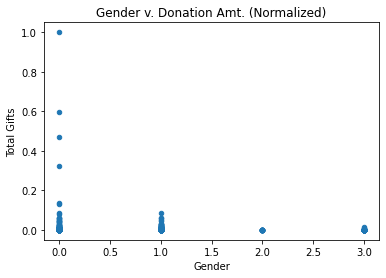

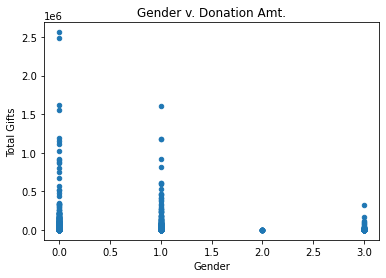

In [473]:
# copy the data
df_max_scaled = num_prev_donors.copy()
  
# eliminate outliers for total gifts (will revisit in another section)
num_prev_donors['Total Gifts'] = num_prev_donors['Total Gifts'].mask(num_prev_donors['Total Gifts']>=5000000)
    
# apply normalization techniques on Total Gifts column
column = 'Total Gifts'
df_max_scaled[column] = df_max_scaled[column] / df_max_scaled[column].abs().max()
  
# view normalized data
#display(df_max_scaled['Total Gifts'])

# plot gender/donation relation
plt1 = df_max_scaled.plot(kind = 'scatter', x = 'Gender', y = 'Total Gifts', title = 'Gender v. Donation Amt. (Normalized)')
plt2 = num_prev_donors.plot(kind = 'scatter', x = 'Gender', y = 'Total Gifts', title = 'Gender v. Donation Amt.')

# display averages & medians for each group
male_mean = num_prev_donors['Total Gifts'].mask(num_prev_donors['Gender']!=0).mean()
male_median = num_prev_donors['Total Gifts'].mask(num_prev_donors['Gender']!=0).median()
fem_mean = num_prev_donors['Total Gifts'].mask(num_prev_donors['Gender']!=1).mean()
fem_median = num_prev_donors['Total Gifts'].mask(num_prev_donors['Gender']!=1).median()
nb_mean = num_prev_donors['Total Gifts'].mask(num_prev_donors['Gender']!=2).mean()
nb_median = num_prev_donors['Total Gifts'].mask(num_prev_donors['Gender']!=2).median()
other_mean = num_prev_donors['Total Gifts'].mask(num_prev_donors['Gender']!=3).mean()
other_median = num_prev_donors['Total Gifts'].mask(num_prev_donors['Gender']!=3).median()

# create metrics dataframe
gender_data = {'Male': [male_mean, male_median], 'Female': [fem_mean, fem_median], 'Non-Binary':[nb_mean, nb_median], 'Other':[other_mean, other_median]}
gender_df = pd.DataFrame(data=gender_data, index = ['Mean', 'Median'])
gender_df = gender_df.round(2)
gender_df

### Feature Selection

In [491]:
# evaluate the feature selection numeric data
fs_df = numeric_donors.copy()
print('Shape for numeric donors before filtering $10000 or more: {}'.format(fs_df.shape))

# important note, we need to account for ONLY donors below $10,000 as per City Year's request
fs_df = fs_df.mask(fs_df['Total Gifts']>=10000).dropna()

# print new shape of data we are working with
print('Shape for numeric donors after filtering $10000 or more: {}'.format(fs_df.shape))

Shape for numeric donors before filtering $10000 or more: (76886, 13)
Shape for numeric donors after filtering $10000 or more: (75473, 13)


In [492]:
# find VIF for all features, first we import the library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [493]:
# set independent variables, in this test case we will attempt to predict Total Gifts
X = fs_df.loc[:, fs_df.columns != 'Total Gifts']
Y = fs_df.loc[:, fs_df.columns == 'Total Gifts']

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
  
print(vif_data)

                      feature       VIF
0        Best Gift Year Total  5.547245
1           Soft Credit Total  1.004091
2            Last Gift Amount  5.025548
3         Current FY Received  1.034462
4       Soft Credit This Year  1.030380
5       Soft Credit Last Year  1.122812
6       Total Gifts Last Year  1.138588
7           First Gift Amount  4.627015
8            City Year Alumni  1.023191
9       Active Staff or Corps  1.020213
10  Total Gifts Two Years Ago  1.122110
11  Soft Credit Two Years Ago  1.135089


Variance Inflation Factor (VIF) is one way of detecting multicollinearity in a set of features. In this instance, we will go ahead and eliminate any features with VIF > 10, as they skew our data and complicate our model.

NOTE: Eliminating one feature will affect the others, so we need to retest every time we eliminate a feature.

jk eliminating all >$10000 donors fixed VIF issues so we can ignore the next few cells

In [494]:
#X = X.loc[:, X.columns != 'Total Gifts Last Year']
#X = X.loc[:, X.columns != 'Best Gift Year Total']

In [495]:
# VIF dataframe
#vif_data = pd.DataFrame()
#vif_data["feature"] = X.columns

# calculating VIF for each feature
#vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
  
#print(vif_data)

We can see that eliminating the two features 'Total Gifts Last Year' and 'Best Gift Year Total' reduced our VIF in other features greatly. Our data is now clear of any multicollinearity and we can safely form some regression models from this.

# Section IV: Model Development & Validation

Remember, our primary goals are as follows:

1. Establish pattern of donors who give <$10,000 (this could be $10000 per transaction or $10000 lifetime given, got to clarify w/ City Year)
2. Establish giving level to ask for within donor segments
3. Using a ML driven strategy to optimize donations received, what is the right amount to ask to maximize the amount donated or is best not to ask for a certain amount?
4. What is the most effect verbiage of appeal letters to maximize likelihood to receive donations from a campaign?
5. Can wealth engine data be effectively imputed for missing contacts?

We will start with clustering the previous donors and attempting to establish any patterns between them. (We already identified one pattern, that 'Total Gifts Last Year' & 'Best Gift Year Total' are highly correlated. Worth mentioning or investigating in some other capacity.)

In [500]:
# import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import math

In [520]:
# split X & Y into test/train sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# evaluate shape of train/test
print(X_train.shape, X_test.shape)

# develop an SLR model to predict Total Gifts
linear_regressor = LinearRegression()  # create object for the class
mlr = linear_regressor.fit(X_train, y_train)  # perform linear regression
y_pred = mlr.predict(X_test)  # make predictions

# find MSE/RMSE of regression model
MSE = np.square(np.subtract(y_test,y_pred)).mean()
RMSE = math.sqrt(MSE)
score = slr.score(X_test, y_test)

print('MSE: {}'.format(MSE))
print('RMSE: {}'.format(RMSE))
print('Score/Correlation: {}'.format(score))

print('MLR coefficients: {}'.format(mlr.coef_))

(52831, 12) (22642, 12)
MSE: Total Gifts    206424.551938
dtype: float64
RMSE: 454.33968783033555
Score/Correlation: 0.7654156574186459
MLR coefficients: [[ 1.77368154e+00  1.04702672e-05 -3.27882293e-01  5.87809929e-01
   1.06362992e-02  2.78153896e-03  2.82843374e-01 -3.93193118e-01
  -6.62088839e+00  9.58625182e+01  6.11209470e-01  1.00846614e-04]]


Staff Total Gifts per capita: $1.62
Non-Staff Total Gifts per capita: $0.01
Active Staff/Corps Median Total Gifts: 130.0
Active Staff/Corps Average Total Gifts: 540.8530630630631
Non-Active Staff/Corps Median Total Gifts: 100.0
Non-Active Staff/Corps Average Total Gifts: 392.93262776151107


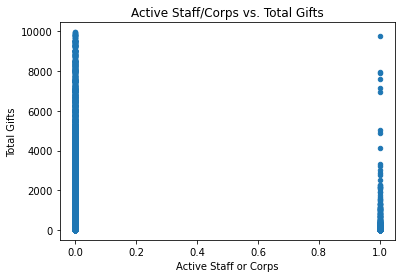

In [531]:
plt3 = fs_df.plot(kind = 'scatter', x = 'Active Staff or Corps', y = 'Total Gifts', title = 'Active Staff/Corps vs. Total Gifts')

staff_per_capita = fs_df['Total Gifts'].where(fs_df['Active Staff or Corps']==1).mean()/sum(fs_df['Active Staff or Corps']==1)
print('Staff Total Gifts per capita: $%0.2f'%staff_per_capita)
non_staff_per_capita = fs_df['Total Gifts'].where(fs_df['Active Staff or Corps']==0).mean()/sum(fs_df['Active Staff or Corps']==0)
print('Non-Staff Total Gifts per capita: $%0.2f'%non_staff_per_capita)

print('Active Staff/Corps Median Total Gifts: {}'.format(fs_df['Total Gifts'].where(fs_df['Active Staff or Corps']==1).median()))
print('Active Staff/Corps Average Total Gifts: {}'.format(fs_df['Total Gifts'].where(fs_df['Active Staff or Corps']==1).mean()))

print('Non-Active Staff/Corps Median Total Gifts: {}'.format(fs_df['Total Gifts'].where(fs_df['Active Staff or Corps']==0).median()))
print('Non-Active Staff/Corps Average Total Gifts: {}'.format(fs_df['Total Gifts'].where(fs_df['Active Staff or Corps']==0).mean()))


On average, active staff/corps give 38% more than non-active staff or corps. The median findings support the theory that active staff/corps give more over their lifetimes than non-active staff/corps.

The multiple linear regression model worked somewhat effectively, but we can establish a better correlation score between features and total giving than 0.75, so we are going to try cross validating the model and new models below.

In [509]:
# first we cross validate the MLR model from above to get a validated correlation metric (K-fold where k=5)
scores = cross_val_score(slr, X, Y, cv=5)
print("%0.2f correlation with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.75 correlation with a standard deviation of 0.08


In [ ]:
# now we investigate how a rf regression model performs
